# QMA Calibration

\begin{equation}
\Gamma_{pdp} = a \cdot \left( I - I_0 + \tau\frac{dI}{dt}\right)
\end{equation}
Where $a$ - calibration coefficient to convert QMS current into particle flux for steady state pressures ($\tau\frac{dI}{dt} \ll I$).

Where $\tau=\frac{V}{S}$ - effective pumping time.

In [1]:
import datetime
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from quest_pp_calibration.std import pdp_std

plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "regular"

In [2]:
pp_pth = '../../data/raw/pdp8_shot_txt'
filename = '17012355 PDP 8.txt'

df = pd.read_csv(join(pp_pth,filename),delimiter='\t')
x = df[df.select_dtypes('number').columns[0]]
y = df[df.select_dtypes('number').columns[-2]]

# Calculation $a$

calibrationsummary.py

shot = 17012355

R.update(
    [
        // ...
        (8, [0, 5, 120, 130]),
    ]
)

In [3]:
calib_list = [0, 5, 120, 130]
calib_start = (x >= calib_list[0]) & (x <= calib_list[1])
calib_end = (x >= calib_list[2]) & (x <= calib_list[3])

I_start = y[calib_start].iloc[0]
I_end = y[calib_end].iloc[-1]

I_delta = abs(I_start - I_end)

print("I_delta:", I_delta)

I_delta: 3.4436e-08


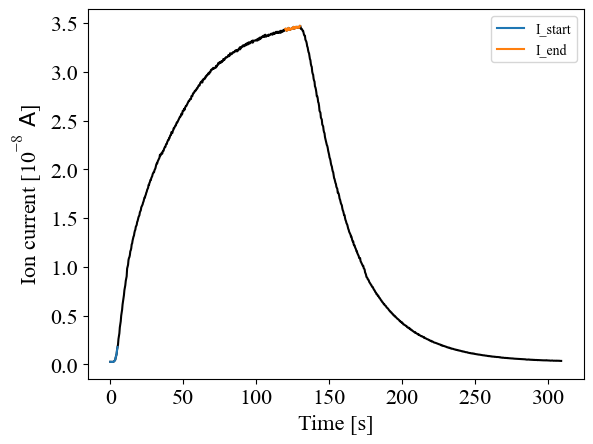

In [4]:
plt.plot(x, y/1e-8, color='black',)

plt.plot(x[calib_start], y[calib_start]/1e-8, label = "I_start")
plt.plot(x[calib_end], y[calib_end]/1e-8, label = "I_end")

plt.xlabel("Time [s]", fontsize=16)
plt.ylabel(r'Ion current [$10^{-8} \ \mathrm{A}$]', fontsize=16)
plt.tick_params(labelsize=16)
plt.legend()

plt.show()

In [5]:
alpha = pdp_std(datetime.date(2017,1,23))/I_delta * 2 # H atoms per second
print(f'alpha = {alpha:.2e}')

alpha = 2.91e+22


# Calculation $\tau$

\begin{equation}
I(t) = I_0 e^{-\frac{t}{\tau}}
\end{equation}

In [6]:
def I_func(x, tau, a, b,):
    return a*np.exp((-1/tau)*x)+b

In [7]:
tau_calib_time = (x >= calib_list[-1]+5)
tau_x = x[tau_calib_time]
tau_y = y[tau_calib_time]

In [8]:
popt, pcov = curve_fit(I_func, tau_x, tau_y, p0=(100, 1, 1), maxfev=5000)

tau = popt[0]
print('tau', '{:.2f}'.format(tau))


tau 31.16


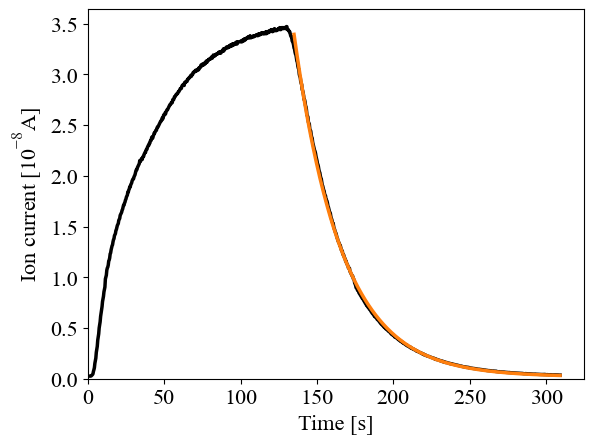

In [9]:
xx = np.linspace(tau_x.iloc[0], tau_x.iloc[-1], 1000)
yy = I_func(xx, *popt)

plt.plot(x, y/1e-8, color='k', markersize=2, linewidth=2.5)
plt.plot(xx, yy/1e-8, color='tab:orange', markersize=2, linewidth=2.5)

plt.tick_params(labelsize=16)
plt.xlabel("Time [s]", fontsize=16)
plt.ylabel(r'Ion current [$10^{-8} A$]', fontsize=16)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()